In [25]:
import pandas as pd
from os.path import join
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
plt.rcParams["figure.figsize"] = [10, 6]

# Analiza dynamiki fiksacji
## Analiza A - dynamika w funkcji wybranej odpowiedzi

In [42]:
Lmin = 0
Lmax = 24
WINDOW_SIZE = 5
results = join('..', 'results', 'results_window_5')

In [56]:
### Wszystkie triale
full = pd.read_csv(join(results, 'dynamics_full.csv'))
corr = pd.read_csv(join(results, 'dynamics_corr.csv'))
err = pd.read_csv(join(results, 'dynamics_err.csv'))
# lev_easy = pd.read_csv(join(results, 'dynamics_lev_easy.csv'))
# lev_med = pd.read_csv(join(results, 'dynamics_lev_med.csv'))
# lev_hard = pd.read_csv(join(results, 'dynamics_lev_hard.csv'))
wmc_low = pd.read_csv(join(results, 'dynamics_wmc_low.csv'))
wmc_med = pd.read_csv(join(results, 'dynamics_wmc_med.csv'))
wmc_high = pd.read_csv(join(results, 'dynamics_wmc_high.csv'))

# Predziały ufności
1.96 razy odchylenie standardowe danej miary (tzn. albo PROP_FO albo AVG_RM) podzielone przez pierwiastek kwadratowy z liczby triali dla tej sekundy (czyli Kx): 1.96*(SDx/SQRT(Kx)) [inaczej 1.96 razy błąd standardowy miary w danej sekundzie].

In [52]:
def add_CI_PROP(data):
    data["PROP_FOx_low_CI"] = data['PROP_FOx'] -  (1.96 * (data.FOx_STD / np.sqrt(data.Kx)))
    data["PROP_FOx_high_CI"] = data["PROP_FOx"] +  (1.96 * (data.FOx_STD / np.sqrt(data.Kx)))
    
def add_CI_RM(data):
    data["AVG_RMx_low_CI"] = data['AVG_RMx'] -  (1.96 * (data.RMx_STD / np.sqrt(data.RMk)))
    data["AVG_RMx_high_CI"] = data['AVG_RMx'] +  (1.96 * (data.RMx_STD / np.sqrt(data.RMk)))
    
def plot_CI(data, param,labels, title):
    # Define a function for the line plot with intervals
    _, ax = plt.subplots()

    # Plot the data, set the linewidth, color and transparency of the
    # line, provide a label for the legend
    ax.plot([x * WINDOW_SIZE for x in data[0][param].index.tolist()],
            data[0][param].tolist(), 
            lw = 1,
            color = 'green',
            alpha = 1,
            label = labels[0])
    # Shade the confidence interval
    ax.fill_between([x * WINDOW_SIZE for x in data[0][param].index.tolist()],
                    data[0][param+"_low_CI"],
                    data[0][param+"_high_CI"], 
                    color = 'green',
                    alpha = 0.4,
                    label = '95% CI')

    ax.plot([x * WINDOW_SIZE for x in data[1][param].index.tolist()],
            data[1][param].tolist(), 
            lw = 1,
            color = '#539caf',
            alpha = 1,
            label = labels[1])
    # Shade the confidence interval
    ax.fill_between([x * WINDOW_SIZE for x in data[1][param].index.tolist()],
                    data[1][param+"_low_CI"],
                    data[1][param+"_high_CI"], 
                    color = '#539caf',
                    alpha = 0.4,
                    label = '95% CI')

    ax.plot([x * WINDOW_SIZE for x in data[2][param].index.tolist()],
            data[2][param].tolist(), 
            lw = 1,
            color = 'red',
            alpha = 1,
            label = labels[2])
    # Shade the confidence interval
    ax.fill_between([x * WINDOW_SIZE for x in data[2][param].index.tolist()],
                    data[2][param+"_low_CI"],
                    data[2][param+"_high_CI"], 
                    color = 'red',
                    alpha = 0.4,
                    label = '95% CI')

    # Label the axes and provide a title
    ax.set_title(title)
    ax.set_xlabel('Time of experiment(s)')
    ax.set_ylabel(param)
    ax.set_xlim([Lmin,WINDOW_SIZE * (Lmax-1)])
#     ax.set_ylim([0,1])

        # Display legend
    ax.legend(loc = 'best')


# WMC 

## PROP_FOx

In [57]:
add_CI_PROP(wmc_low)
add_CI_PROP(wmc_med)
add_CI_PROP(wmc_high)

<IPython.core.display.Javascript object>


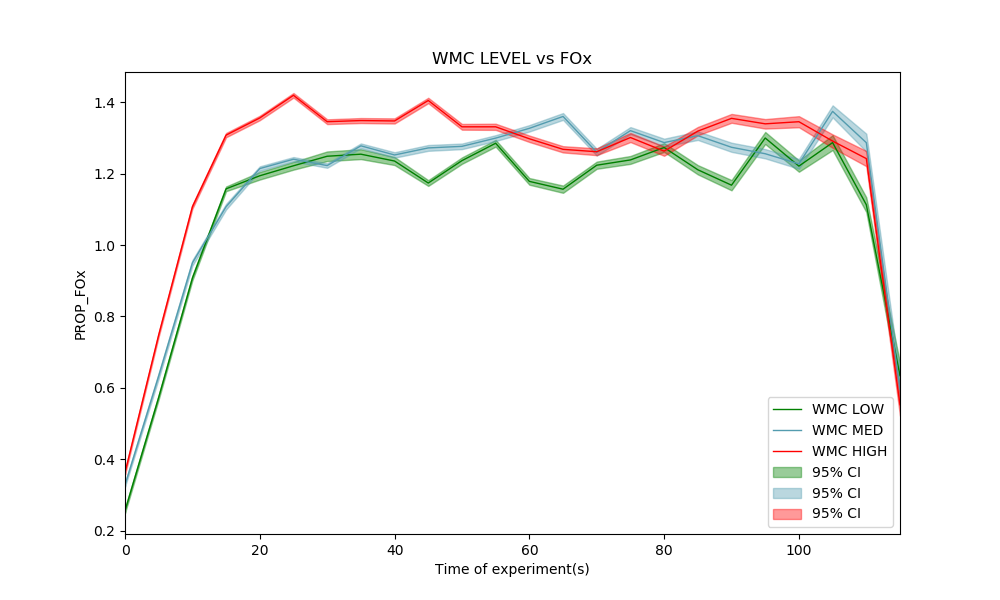

In [58]:
plot_CI([wmc_low, wmc_med, wmc_high], 'PROP_FOx', ['WMC LOW', 'WMC MED', 'WMC HIGH'], 'WMC LEVEL vs FOx')

## RM

In [59]:
add_CI_RM(wmc_low)
add_CI_RM(wmc_med)
add_CI_RM(wmc_high)

<IPython.core.display.Javascript object>


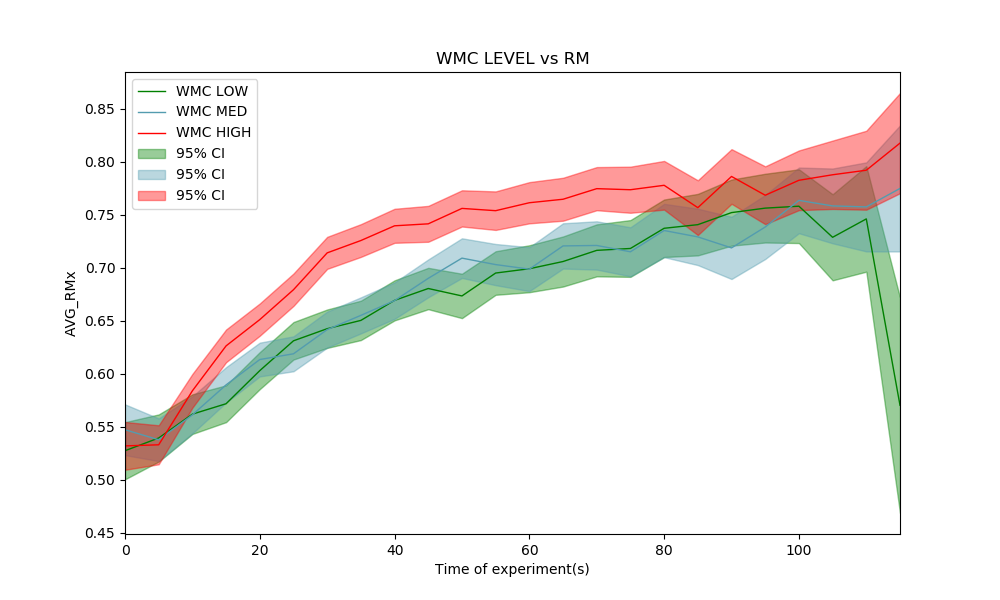

In [60]:
plot_CI([wmc_low, wmc_med, wmc_high], 'AVG_RMx', ['WMC LOW', 'WMC MED', 'WMC HIGH'], 'WMC LEVEL vs RM')

# LEVEL

## PROP_FOx

In [10]:
add_CI_PROP(lev_easy)
add_CI_PROP(lev_med)
add_CI_PROP(lev_hard)

<IPython.core.display.Javascript object>


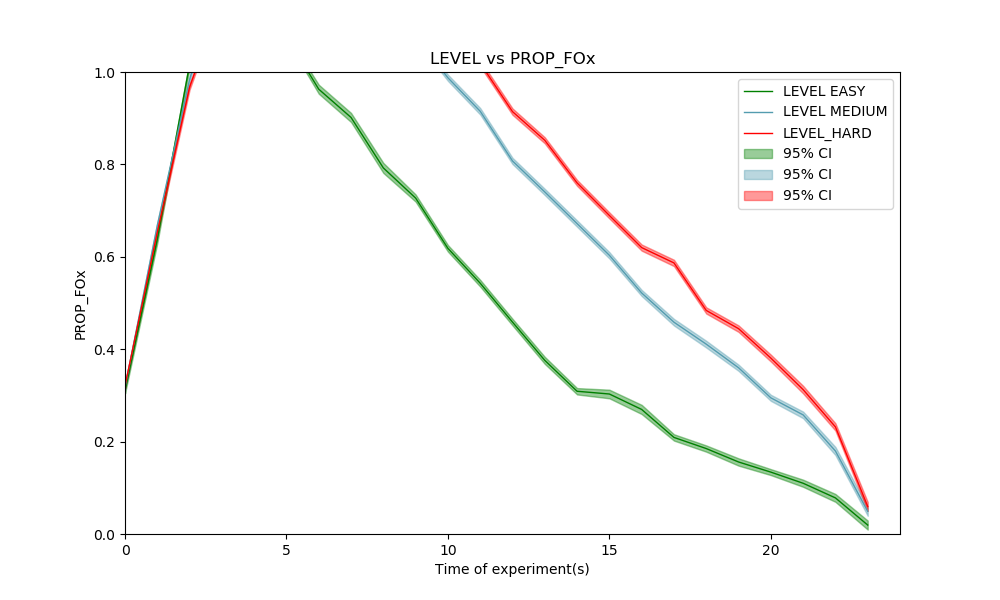

In [11]:
plot_CI([lev_easy, lev_med, lev_hard], 'PROP_FOx', ['LEVEL EASY', 'LEVEL MEDIUM', 'LEVEL_HARD'], 'LEVEL vs PROP_FOx')

## RM

In [12]:
add_CI_RM(lev_easy)
add_CI_RM(lev_med)
add_CI_RM(lev_hard)

<IPython.core.display.Javascript object>


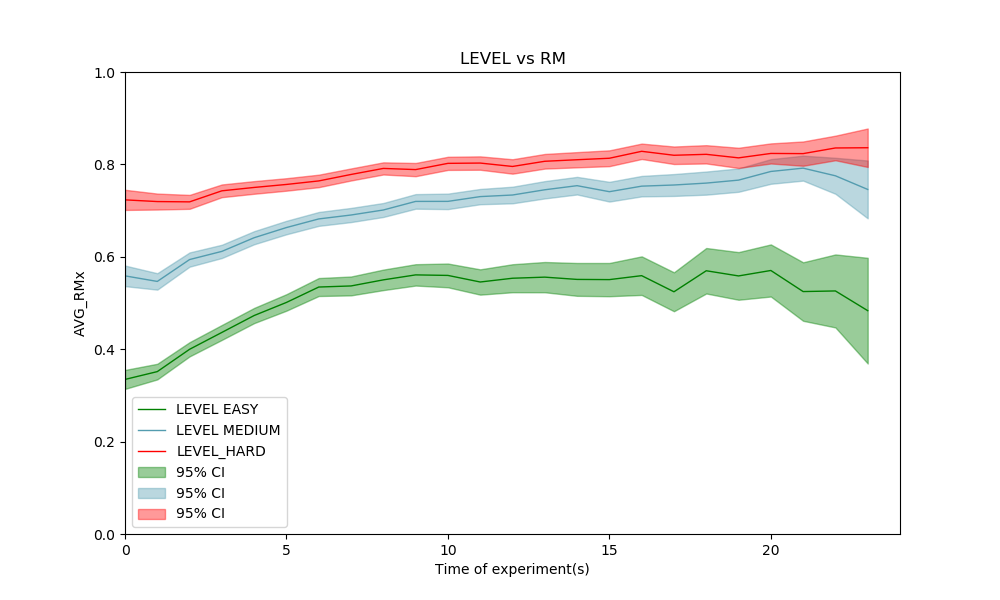

In [13]:
plot_CI([lev_easy, lev_med, lev_hard], 'AVG_RMx', ['LEVEL EASY', 'LEVEL MEDIUM', 'LEVEL_HARD'], 'LEVEL vs RM')

# FULL

## PROP_FOx

In [53]:
add_CI_PROP(full)
add_CI_PROP(corr)
add_CI_PROP(err)

<IPython.core.display.Javascript object>


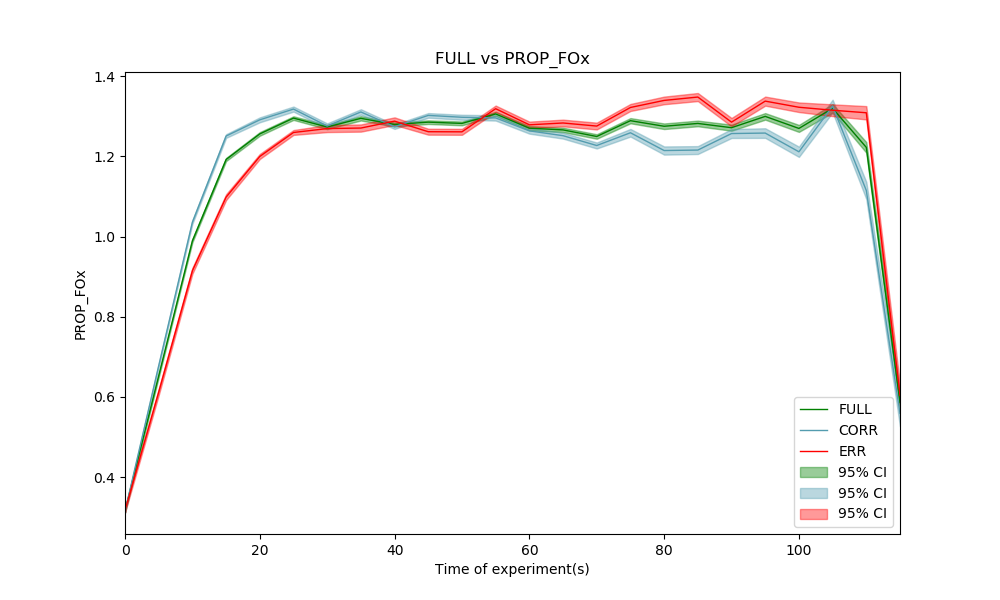

In [54]:
plot_CI([full, corr, err], 'PROP_FOx', ['FULL', 'CORR', 'ERR'], 'FULL vs PROP_FOx')

## RM

In [40]:
add_CI_RM(full)
add_CI_RM(corr)
add_CI_RM(err)

<IPython.core.display.Javascript object>


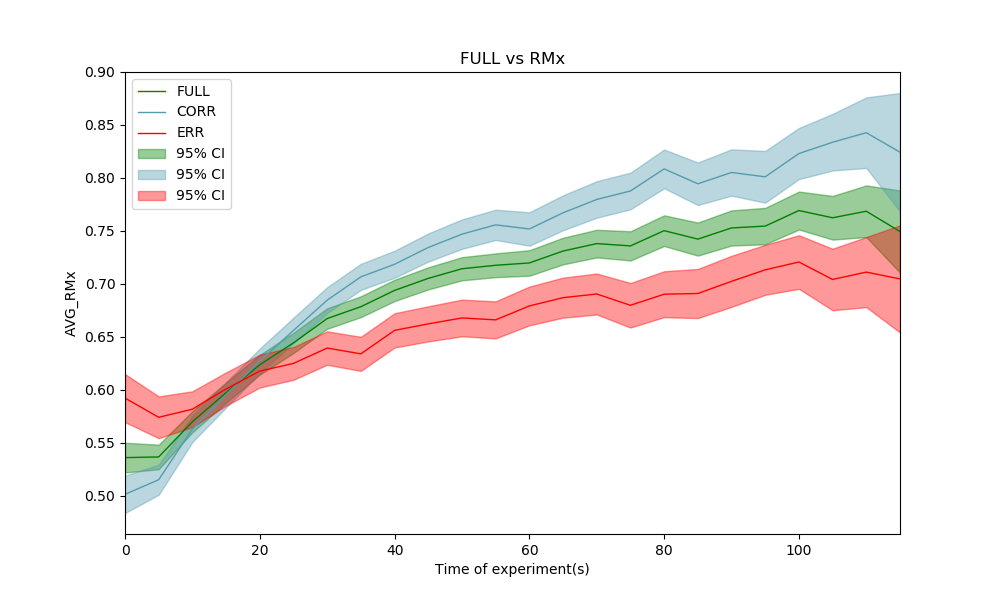

In [55]:
plot_CI([full, corr, err], 'AVG_RMx', ['FULL', 'CORR', 'ERR'], 'FULL vs RMx')